## 1. Setup and Load Data
### Install Dependencies and Setup

In [1]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip list

Package                 Version
----------------------- -----------
absl-py                 2.2.2
asttokens               3.0.0
astunparse              1.6.3
certifi                 2025.1.31
charset-normalizer      3.4.1
comm                    0.2.2
contourpy               1.3.2
cycler                  0.12.1
debugpy                 1.8.14
decorator               5.2.1
executing               2.2.0
flatbuffers             25.2.10
fonttools               4.57.0
gast                    0.6.0
google-pasta            0.2.0
grpcio                  1.71.0
h5py                    3.13.0
idna                    3.10
ipykernel               6.29.5
ipython                 9.1.0
ipython_pygments_lexers 1.1.1
jedi                    0.19.2
jupyter_client          8.6.3
jupyter_core            5.7.2
keras                   3.9.2
kiwisolver              1.4.8
libclang                18.1.1
Markdown                3.7
markdown-it-py          3.0.0
MarkupSafe              3.0.2
matplotlib           

In [55]:
# Import the required dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import pyplot as plt

#### Clean the files and folders

In [7]:
#check and print the current Working Directory
wrk_dir = os.getcwd()
print(f"Current working directory is: {wrk_dir}")

Current working directory is: /home/dolaposalim/tensorflow-env/fila/filadentification/scr


In [23]:
wrk_dir = os.getcwd()
print(f"New working directory is: {wrk_dir}")

New working directory is: /home/dolaposalim/tensorflow-env/fila/filadentification


In [ ]:
# to delete unwanted files in the directory
img_dir = os.path.join(wrk_dir, "img")
for image in os.listdir(img_dir):
    if image.lower().endswith(".jpg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".jpeg"):
        print(f"image: {image} is in the right format")
    elif image.lower().endswith(".png"):
        print(f"image: {image} is in the right format")
    else:
        os.remove(os.path.join(img_dir, image))
        print(f"deleted non jpg image: {image}")
        
print("cleaning completed")

image: 149771532_MzAwLTQwMC01YWQ1NWM5YzY4.jpg is in the right format
image: images (100).jpeg is in the right format
image: images (180).jpeg is in the right format
image: image (21).jpeg is in the right format
image: images (215).jpeg is in the right format
image: images (114).jpeg is in the right format
image: image (1).jpeg is in the right format
image: images (123).jpeg is in the right format
image: images (254).jpeg is in the right format
image: images (104).jpeg is in the right format
image: images (146).jpeg is in the right format
image: images (88).jpeg is in the right format
image: images (273).jpeg is in the right format
image: images (187).jpeg is in the right format
image: images (198).jpeg is in the right format
image: asoebiguest-com-did-you-know-facts-about-the-fila-fila4_1.jpg is in the right format
image: images (51).jpeg is in the right format
image: images (122).jpeg is in the right format
image: images (274).jpeg is in the right format
image: images (42).jpeg is in 

In [32]:
img_folder = r"/home/dolaposalim/tensorflow-env/fila/filadentification/img"
print(f"img_folder: {img_folder}")

img_folder: /home/dolaposalim/tensorflow-env/fila/filadentification/img


In [45]:
#remove images with size less than 10KB
for image in os.listdir(img_folder):
    path = f"{img_folder}/{image}"
    if os.path.isfile(path) and os.path.getsize(path) <= 5 * 1024:
        os.remove(path)

print("All images with size less than 10KB have been deleted.")
   

All images with size less than 10KB have been deleted.


In [ ]:
# Get a sorted list
image_files = [f for f in os.listdir(img_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
image_files.sort()


for index, filename in enumerate(image_files):
    ext = os.path.splitext(filename)[1]
    new_name = f"img_{index}{ext}"
    
    # Full old and new paths
    old_path = os.path.join(img_folder, filename)
    new_path = os.path.join(img_folder, new_name)
    
    # Rename
    os.rename(old_path, new_path)

print(" Renaming complete!")

/home/dolaposalim/tensorflow-env/fila/filadentification/img
 Renaming complete!


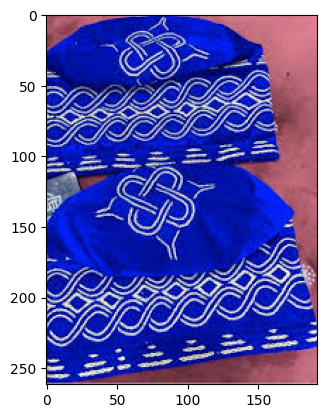

In [ ]:
all_images = [f for f in os.listdir(img_folder)
              if os.path.isfile(os.path.join(img_folder, f))]
#BGR - RGB
random_image = random.choice(all_images)
img = cv2.imread(os.path.join(img_folder, random_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [88]:
img_rgb.shape

(262, 192, 3)

#### Load our data

In [89]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty